# Analysis of published papers

In [1]:
%run setup.py

In [2]:
df_Invited = pd.read_csv(os.path.join(filepath,'factInvited.csv'))
df_Proceedings = pd.read_csv(os.path.join(filepath,'factProceedings.csv'))

df_Proceedings.head()

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,column_equal,Paper Count,Max Paper Count,First year paper,ID,Age,Productivity,Conference (long),Main Topic
0,Aaron Gage,2004,AAAI,Aaron,NaN,Gage,M,True,7,8,1999,Aaron Gage_1,5,1.400000,AAAI Conference on Artificial Intelligence,Artificial Intelligence
1,Abhi Shelat,2004,AAAI,Abhi,NaN,Shelat,M,True,7,75,2002,Abhi Shelat_1,2,3.500000,AAAI Conference on Artificial Intelligence,Artificial Intelligence
2,Adele E. Howe,2004,AAAI,Adele,E.,Howe,F,True,48,91,1986,Adele E. Howe_1,18,2.666667,AAAI Conference on Artificial Intelligence,Artificial Intelligence
3,Akihiro Kishimoto,2004,AAAI,Akihiro,NaN,Kishimoto,M,True,4,62,2002,Akihiro Kishimoto_1,2,2.000000,AAAI Conference on Artificial Intelligence,Artificial Intelligence
4,Al Globus,2004,AAAI,Al,NaN,Globus,M,True,6,6,1990,Al Globus_1,14,0.428571,AAAI Conference on Artificial Intelligence,Artificial Intelligence


### Define function

In [106]:
def plot_hist(list1,list1_label, list2,list2_label,fig_title,n_bins,fig_name,image_path=image_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    bins=np.histogram(np.hstack((list1,list2)), bins=n_bins)[1]
    
    ax1.hist(list2, bins=bins, alpha=0.7, label=list2_label,density=True)
    ax1.hist(list1, bins=bins, alpha=0.7, label=list1_label,density=True)
    ax1.set_xlabel('Number of publications',fontsize=16)
    ax1.set_ylabel('Density',fontsize=16)
    ax1.set_title('Dist. of publications per speaker',fontsize=19)
    ax1.legend(loc='upper right',fontsize=13)
    ax1.tick_params(axis='both', labelsize=12)
    
    # Prepare data for log-log histogram
    bins = np.logspace(np.log10(min(list1)), np.log10(max(list1)), 20)
    hist,edges = np.histogram(list1, bins=bins, density=True)
    x = (edges[1:]+edges[:-1])/2.

    bins1 = np.logspace(np.log10(min(list2)), np.log10(max(list2)), 20)
    hist1,edges1 = np.histogram(list2, bins=bins, density=True)
    x1 = (edges1[1:]+edges1[:-1])/2.
    
    xx,yy = zip(*[(i,j) for (i,j) in zip(x,hist) if j>0])
    xx1,yy1 = zip(*[(i,j) for (i,j) in zip(x1,hist1) if j>0])
    
    
    ax2.plot(xx1, yy1, label=list2_label,marker='.')
    ax2.plot(xx, yy, label=list1_label,marker='.')
    ax2.set_xlabel('$log$(Number of publications)',fontsize=16)
    ax2.set_ylabel('Probability Density',fontsize=16)
    ax2.set_title('Dist. of $log$(publications) per speaker',fontsize=19)
    ax2.legend(loc='upper right',fontsize=13)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.tick_params(axis='both', labelsize=12)
        
    fig.suptitle(fig_title, fontsize=23)
    plt.savefig(image_path+fig_name,bbox_inches='tight')
    
    plt.show()

In [21]:
def single_plot_hist(list1,list1_label, list2,list2_label,n_bins,title,fig_name, image_path=image_path):
    fig, (ax1) = plt.subplots(1, 1, figsize=(7, 5))

    bins=np.histogram(np.hstack((list1,list2)), bins=n_bins)[1]
    
    ax1.hist(list1, bins=bins, alpha=0.7, label=list1_label,density=True)
    ax1.hist(list2, bins=bins, alpha=0.7, label=list2_label,density=True)
    ax1.set_xlabel('Number of publications',fontsize=17)
    ax1.set_ylabel('Density',fontsize=16)
    ax1.set_title(title,fontsize=19)
    ax1.legend(loc='upper right',fontsize=13)
    ax1.tick_params(axis='both', labelsize=13)
    plt.savefig(image_path+fig_name,bbox_inches='tight')
    plt.show()

## Histogram between invited/proceedings

In [111]:
# Create lists
paper_per_pro = df_Proceedings['Paper Count'].values
paper_per_inv = df_Invited['Paper Count'].values

# drop all the rows with 0 paper count
paper_per_inv = paper_per_inv[paper_per_inv != 0]
paper_per_pro = paper_per_pro[paper_per_pro != 0]

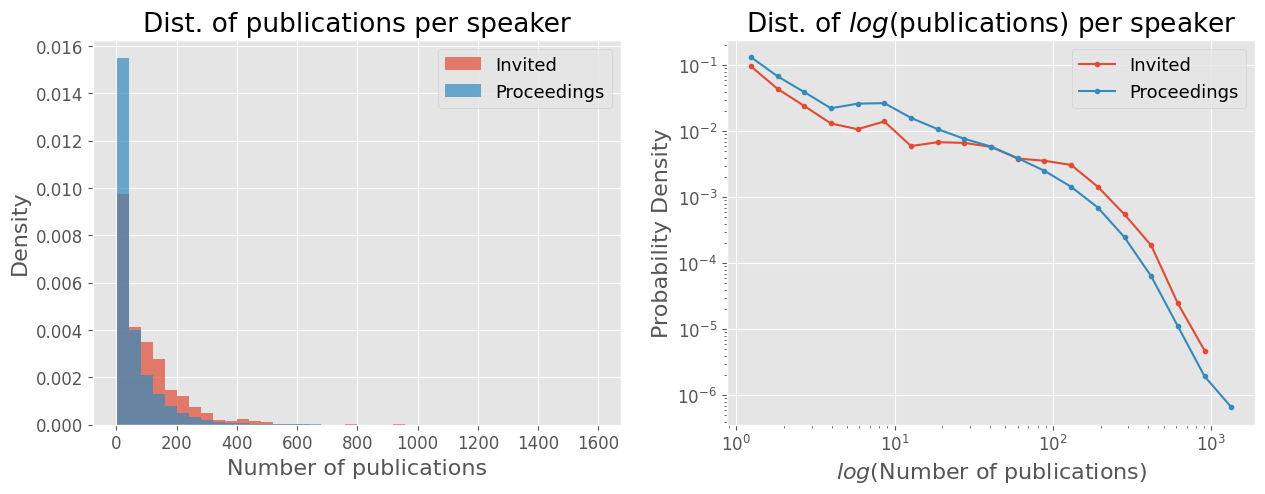

In [113]:
# plot_hist(list1,list1_label, list2,list2_label,fig_title,n_bins,fig_name,image_path=image_path):
plot_hist(paper_per_pro,'Proceedings',paper_per_inv,'Invited','',40,'Hist_paper_inv_pro.pdf')

## Histogram between females and males for invited

In [102]:
# combine the values from Paper Count column from both the dataframes (df_Invited and df_Proceedings) where the gender column is "M" 
paper_per_male_inv = df_Invited[df_Invited['gender'] == 'M']['Paper Count'].values
paper_per_female_inv = df_Invited[df_Invited['gender'] == 'F']['Paper Count'].values

# drop all the rows with 0 paper count
paper_per_male_inv = paper_per_male_inv[paper_per_male_inv != 0]
paper_per_female_inv = paper_per_female_inv[paper_per_female_inv != 0]

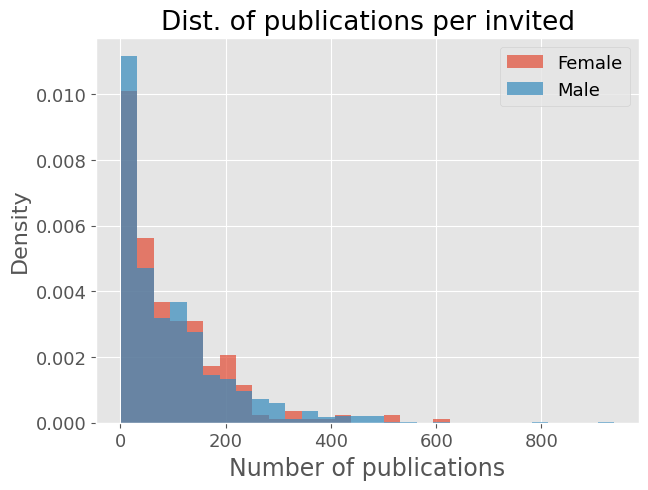

In [103]:
# def single_plot_hist(list1,list1_label, list2,list2_label,n_bins,title,fig_name, image_path=image_path):
single_plot_hist(paper_per_female_inv,'Female',paper_per_male_inv,'Male',30,'Dist. of publications per invited','Hist_paper_inv.pdf')

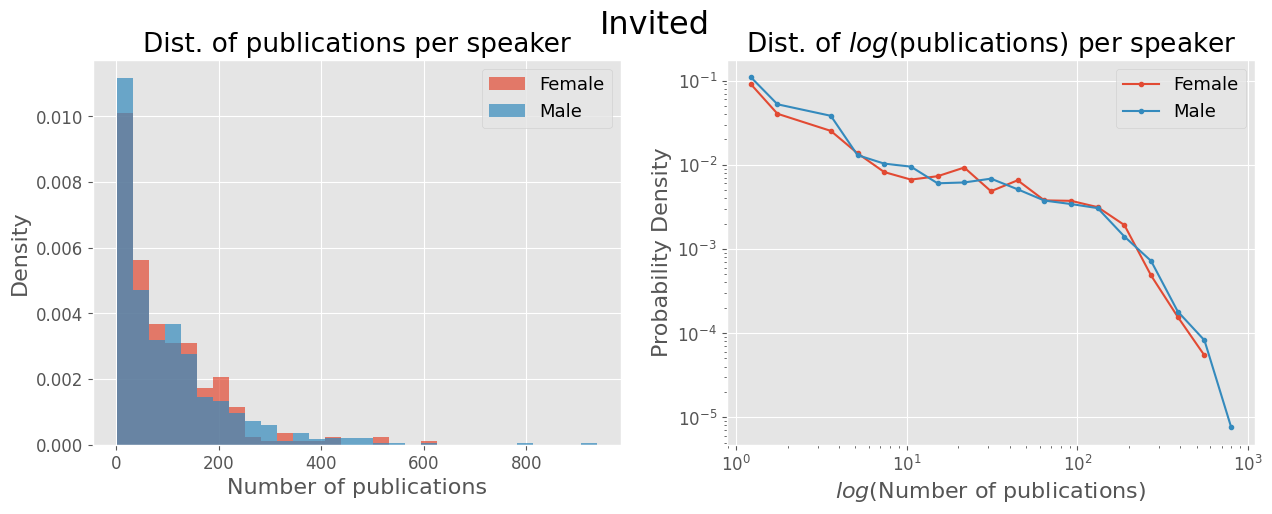

In [107]:
# plot_hist(list1,list1_label, list2,list2_label,fig_title,n_bins,fig_name,image_path=image_path):
plot_hist(paper_per_male_inv,'Male',paper_per_female_inv,'Female','Invited',30,'Hist_paper_inv_log.pdf')

## Histogram between females and males for proceedings

In [108]:
# combine the values from Paper Count column from both the dataframes (df_Invited and df_Proceedings) where the gender column is "M" 
paper_per_male_pro = df_Proceedings[df_Proceedings['gender'] == 'M']['Paper Count'].values
paper_per_female_pro = df_Proceedings[df_Proceedings['gender'] == 'F']['Paper Count'].values

# drop all the rows with 0 paper count
paper_per_male_pro = paper_per_male_pro[paper_per_male_pro != 0]
paper_per_female_pro = paper_per_female_pro[paper_per_female_pro != 0]

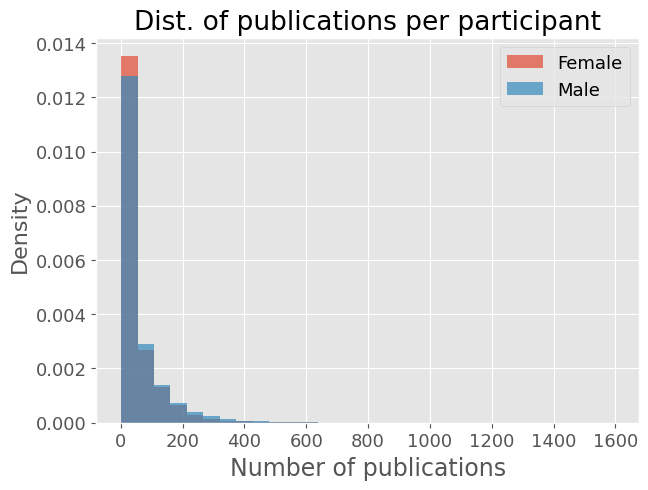

In [109]:
single_plot_hist(paper_per_female_pro,'Female',paper_per_male_pro,'Male',30,'Dist. of publications per participant','Hist_paper_pro.pdf')

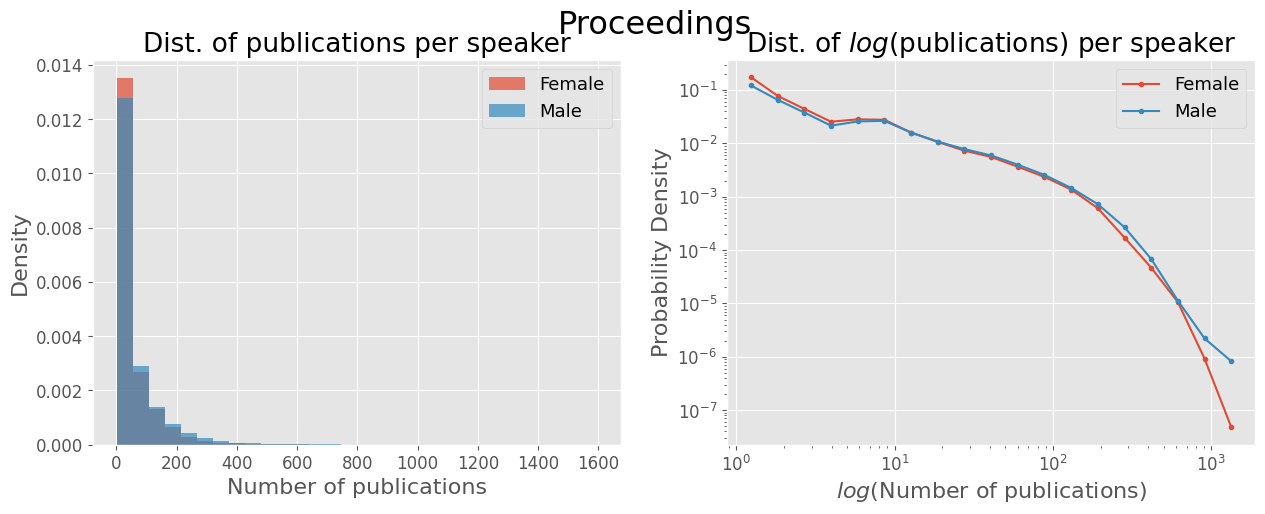

In [110]:
plot_hist(paper_per_male_pro,'Male',paper_per_female_pro,'Female','Proceedings',30,'Hist_paper_pro_log.pdf')

## Histogram of fields

### Define function

In [94]:
def get_field_lists(df,field):        
    df = df[df['Main Topic'] == field]
    list_M = df[df['gender'] == "M"]['Paper Count'].values
    list_F = df[df['gender'] == "F"]['Paper Count'].values
    
    list_M = list_M[list_M != 0]
    list_F = list_F[list_F != 0]
    return list_M,list_F

conference_list = list(df_Invited['Main Topic'].unique())
conference_list = [item for item in conference_list if item != 'Computer Architecture']

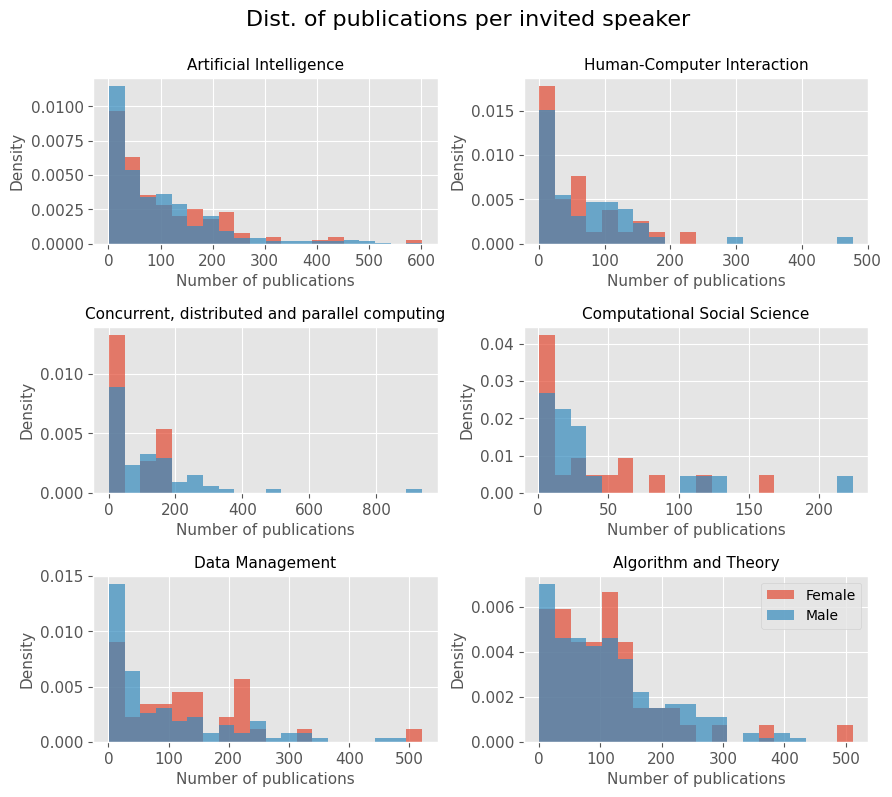

In [95]:
fig = plt.figure(figsize=(10, 17))
plt.subplots_adjust(top=0.94,hspace=0.5, wspace=0.25)

for n, field in enumerate(conference_list):
    ax = plt.subplot(len(conference_list), 2, n + 1)
    
    paper_male_inv_field, paper_female_inv_field = get_field_lists(df_Invited, field)
    
    bins=np.histogram(np.hstack((paper_female_inv_field,paper_male_inv_field)), bins=20)[1]
    
    ax.hist(paper_female_inv_field, bins=bins, alpha=0.7, label='Female',density=True)
    ax.hist(paper_male_inv_field, bins=bins, alpha=0.7, label='Male',density=True)
    ax.set_xlabel('Number of publications',fontsize=11)
    ax.set_ylabel('Density',fontsize=11)
    ax.set_title(field,fontsize=11)

    ax.tick_params(axis='both', labelsize=11)
fig.suptitle('Dist. of publications per invited speaker', fontsize=16)
plt.legend()
plt.savefig(image_path+'Hist_paper_inv_field_all.pdf',bbox_inches='tight')
plt.show()

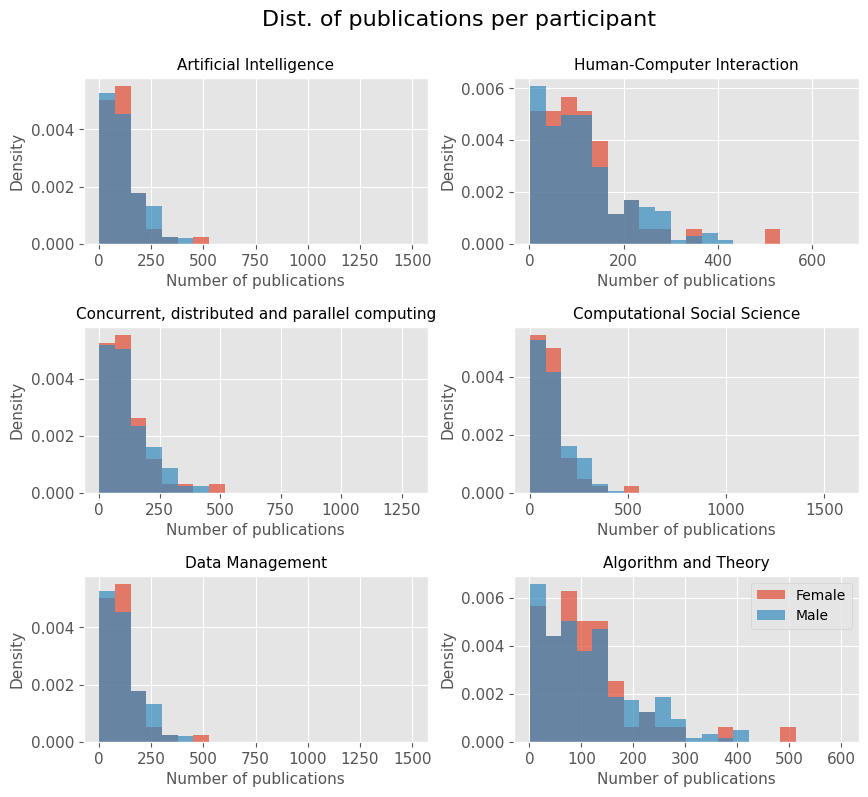

In [79]:
fig = plt.figure(figsize=(10, 17))
plt.subplots_adjust(top=0.94,hspace=0.5, wspace=0.25)

for n, field in enumerate(conference_list):
    ax = plt.subplot(len(conference_list), 2, n + 1)
    
    paper_male_pro_field, paper_female_pro_field = get_field_lists(df_Proceedings, field)
    
    bins=np.histogram(np.hstack((paper_female_pro_field,paper_male_pro_field)), bins=20)[1]
    
    ax.hist(paper_female_inv_field, bins=bins, alpha=0.7, label='Female',density=True)
    ax.hist(paper_male_inv_field, bins=bins, alpha=0.7, label='Male',density=True)
    ax.set_xlabel('Number of publications',fontsize=11)
    ax.set_ylabel('Density',fontsize=11)
    ax.set_title(field,fontsize=11)

    ax.tick_params(axis='both', labelsize=11)
fig.suptitle('Dist. of publications per participant', fontsize=16)
plt.legend()
plt.savefig(image_path+'Hist_paper_pro_field_all.pdf',bbox_inches='tight')
plt.show()

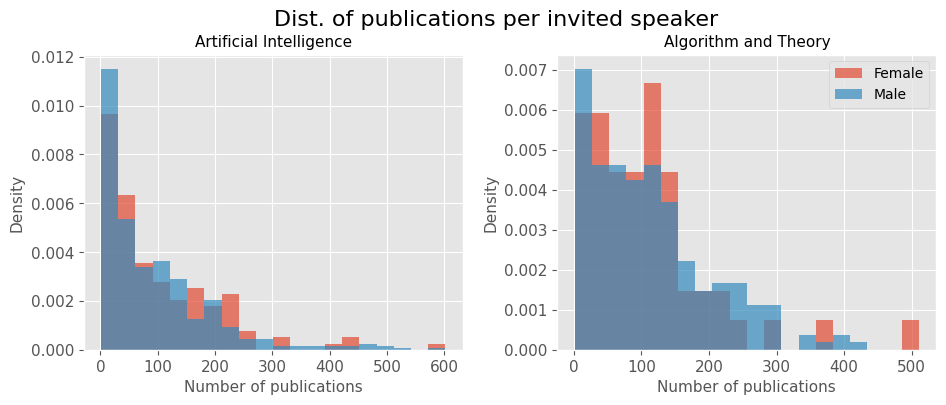

In [101]:
fig = plt.figure(figsize=(11, 9))
plt.subplots_adjust(top=0.93,hspace=0.5, wspace=0.25)
conference_list = ['Artificial Intelligence','Algorithm and Theory']

for n, field in enumerate(conference_list):
    ax = plt.subplot(len(conference_list), 2, n + 1)
    
    paper_male_inv_field, paper_female_inv_field = get_field_lists(df_Invited, field)
    
    bins=np.histogram(np.hstack((paper_female_inv_field,paper_male_inv_field)), bins=20)[1]
    
    ax.hist(paper_female_inv_field, bins=bins, alpha=0.7, label='Female',density=True)
    ax.hist(paper_male_inv_field, bins=bins, alpha=0.7, label='Male',density=True)
    ax.set_xlabel('Number of publications',fontsize=11)
    ax.set_ylabel('Density',fontsize=11)
    ax.set_title(field,fontsize=11)

    ax.tick_params(axis='both', labelsize=11)
fig.suptitle('Dist. of publications per invited speaker', fontsize=16)
plt.legend()
plt.savefig(image_path+'Hist_paper_inv_field_two_fields.pdf',bbox_inches='tight')
plt.show()